<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/check_and_prepro_data_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!cp -r '/content/drive/MyDrive/Movies/data/mojo_japan/' '/content/'
!cp -r '/content/drive/MyDrive/Movies/data/metadata_filmarks/' '/content/'

In [94]:
!pip install japanize_matplotlib
import pandas as pd
import codecs 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import japanize_matplotlib

import warnings

In [95]:
def read_data(path, encode_type):
    
    with codecs.open(path, "r", encode_type, "ignore") as file:
        data = pd.read_csv(file, delimiter=",")
    
    return data 

In [96]:
meta_data = '/content/mojo_japan/'
metadata_filmarks = '/content/metadata_filmarks/'
data = read_data(meta_data+'data_2017.csv',encode_type="Shift-JIS")
data_filmarks = read_data(metadata_filmarks + 'data_2017_2020_11_25_015410.csv',encode_type='utf-8') 

監督，原作，キャストに関してカウントエンコーディングを行う

In [97]:
data.head(2)

,Rank,Title,Title (ja),Theaters,Release Date,Distributor,Gross,Total Gross,url,age,Filmarks URL
0,1,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",https://www.boxofficemojo.com/year/2017/?area=...,2017,https://filmarks.com/movies/61335
1,2,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,Toho-Towa\n\n,"$64,950,363","$66,229,119",https://www.boxofficemojo.com/year/2017/?area=...,2017,https://filmarks.com/movies/71583


In [98]:
data_filmarks.head(2)

,レビュー数,平均スコア,header情報,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,あらすじ,監督,脚本,原作,キャスト,URL
0,174960件,4.0点,美女と野獣 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filmarks映画,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,'ひとりの美しい王子が、呪いによって醜い野獣の姿に変えられてしまう。魔女が残した一輪のバラの...,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335
1,31903件,3.6点,怪盗グルーのミニオン大脱走 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filma...,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,'晴れて結婚したグルーとルーシーの前に、人類を脅かす新たな悪党バルタザール・ブラットが立ちは...,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583


In [99]:
data.shape, data_filmarks.shape

((190, 11), (188, 19))

data_filmarks <- data　という形でマージする

In [100]:
data_filmarks.head(2)

,レビュー数,平均スコア,header情報,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,あらすじ,監督,脚本,原作,キャスト,URL
0,174960件,4.0点,美女と野獣 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filmarks映画,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,'ひとりの美しい王子が、呪いによって醜い野獣の姿に変えられてしまう。魔女が残した一輪のバラの...,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335
1,31903件,3.6点,怪盗グルーのミニオン大脱走 - 映画情報・レビュー・評価・あらすじ・動画配信 | Filma...,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,'晴れて結婚したグルーとルーシーの前に、人類を脅かす新たな悪党バルタザール・ブラットが立ちは...,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583


In [101]:
#無視したい列を除く
Sysnopsis_data = data_filmarks[['タイトル(英名)','あらすじ']]
data_filmarks = data_filmarks.drop(['レビュー数','平均スコア', 'header情報',  'あらすじ' ], axis=1) ##'タイトル(日本名)','タイトル(英名)'
data = data.drop(['url','Release Date'], axis=1) #'Title','Title (ja)'


In [102]:
data = data.rename(columns={'Filmarks URL':'URL'}) 

In [103]:
data.shape, data_filmarks.shape

((190, 9), (188, 15))

In [104]:
df = data_filmarks.merge(data, how='left',on='URL')

In [105]:
df

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age
0,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335,1.0,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",2017.0
1,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583,2.0,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,"$64,950,363","$66,229,119",2017.0
2,パイレーツ・オブ・カリビアン 最後の海賊,Pirates of the Caribbean: Dead Men Tell No Tales,2017年,上映日：2017年07月01日 ／ 製作国：アメリカ ／ 上映時間：129分,NaN,NaN,NaN,製作国：アメリカ,129,アクションアドベンチャー・冒険,"['ヨアヒム・ローニング', 'エスペン・サンドベリ']",[],[],"['ヨアヒム・ローニング', 'エスペン・サンドベリ', 'ジョニー・デップ', 'オーラン...",https://filmarks.com/movies/56771,3.0,Pirates of the Caribbean: Dead Men Tell No Tales,パイレーツ・オブ・カリビアン/最後の海賊,-,Walt Disney Pictures\n\n,"$59,765,357","$59,765,357",2017.0
3,君の名は。,NaN,2016年,上映日：2016年08月26日 ／ 製作国：日本 ／ 上映時間：107分,NaN,NaN,NaN,製作国：日本,107,恋愛アニメ,['新海誠'],['新海誠'],[],"['新海誠', '新海誠', 'RADWIMPS', '神木隆之介', '上白石萌音', '...",https://filmarks.com/movies/65931,4.0,Your Name.,君の名は,301,Toho\n\n,"$49,762,752","$233,794,134",2017.0
4,モアナと伝説の海,Moana,2016年,上映日：2017年03月10日 ／ 製作国：アメリカ ／ 上映時間：107分,NaN,NaN,NaN,製作国：アメリカ,107,ファミリーアニメミュージカル,"['ロン・クレメンツ', 'ジョン・マスカー']",[],[],"['ロン・クレメンツ', 'ジョン・マスカー', 'アウリイ・カルバーリョ', 'ドウェイン...",https://filmarks.com/movies/60104,5.0,Moana,モアナと伝説の海,568,Walt Disney Pictures\n\n,"$44,819,180","$45,915,441",2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,ソーセージ・パーティー,Sausage Party,2016年,上映日：2016年11月04日 ／ 製作国：アメリカ ／ 上映時間：89分,NaN,NaN,NaN,製作国：アメリカ,89,コメディアニメ,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン']","['カイル・ハンター', 'セス・ローゲン', 'エヴァン・ゴールドバーグ', 'Ariel...",[],"['グレッグ・ティアナン', 'コンラッド・ヴァーノン', 'カイル・ハンター', 'セス・...",https://filmarks.com/movies/64379,186.0,Sausage Party,ソーセージ・パーティー,8,Sony Pictures Releasing\n\n,"$37,399","$731,857",2017.0
186,不都合な真実２：放置された地球,An Inconvenient Sequel: Truth to Power,2017年,上映日：2017年11月17日 ／ 製作国：アメリカ ／ 上映時間：100分,NaN,NaN,NaN,製作国：アメリカ,100,NaN,"['ボニー・コーエン', 'ジョン・シェンク']",[],[],"['ボニー・コーエン', 'ジョン・シェンク', 'アル・ゴア', 'バラク・オバマ', '...",https://filmarks.com/movies/73790,187.0,An Inconvenient Sequel: Truth to Power,不都合な真実２：放置された地球,10,Paramount Pictures International\n\n,"$21,085","$41,091",2017.0
187,インフェルノ,Inferno,2016年,上映日：2016年10月28日 ／ 製作国：アメリカハンガリー ／ 上映時間：121分,NaN,NaN,NaN,製作国：アメリカハンガリー,121,ミステリー,['ロン・ハワード'],['デヴィッド・コープ'],[],"['ロン・ハワード', 'デヴィッド・コープ', 'トム・ハンクス', 'フェリシティ・ジョ...",https://filmarks.com/movies/61510,188.0,Inferno,インフェルノ,483,Sony Pictures Releasing\n\n,"$3,866","$14,456,437",2017.0
188,ロスト・エモーション,Equals,2015年,上映日：2017年03月04日 ／ 製作国：アメリカ ／ 上映時間：102分,NaN,NaN,NaN,製作国：アメリカ,102,NaN,['ドレイク・ドレマス'],['ネイサン・パーカー'],[],"['ドレイク・ドレマス', 'ネイサン・パーカー', 'クリステン・スチュワート', 'ニコ...",https://filmarks.com/movies/59213,189.0,Equals,ロスト・エモーション,2,Twin Film\n\n,"$3,087","$3,087",2017.0


In [106]:
#長さが同じならこっちの方が速い
"""
df = pd.concat([
            data_filmarks.reset_index(drop=True),
            data.reindex(data_filmarks['URL'].values).reset_index(drop=True)         
            ], axis=1)
"""

"\ndf = pd.concat([\n            data_filmarks.reset_index(drop=True),\n            data.reindex(data_filmarks['URL'].values).reset_index(drop=True)         \n            ], axis=1)\n"

In [107]:
df.shape

(190, 23)

In [108]:
df

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age
0,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335,1.0,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",2017.0
1,怪盗グルーのミニオン大脱走,Despicable Me 3,2017年,上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分,NaN,NaN,NaN,製作国：アメリカ,90,アニメ,"['ピエール・コフィン', 'カイル・バルタ']",['ケン・ダウリオ'],[],"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...",https://filmarks.com/movies/71583,2.0,Despicable Me 3,怪盗グルーのミニオン危機一発,375,Toho-Towa\n\n,"$64,950,363","$66,229,119",2017.0
2,パイレーツ・オブ・カリビアン 最後の海賊,Pirates of the Caribbean: Dead Men Tell No Tales,2017年,上映日：2017年07月01日 ／ 製作国：アメリカ ／ 上映時間：129分,NaN,NaN,NaN,製作国：アメリカ,129,アクションアドベンチャー・冒険,"['ヨアヒム・ローニング', 'エスペン・サンドベリ']",[],[],"['ヨアヒム・ローニング', 'エスペン・サンドベリ', 'ジョニー・デップ', 'オーラン...",https://filmarks.com/movies/56771,3.0,Pirates of the Caribbean: Dead Men Tell No Tales,パイレーツ・オブ・カリビアン/最後の海賊,-,Walt Disney Pictures\n\n,"$59,765,357","$59,765,357",2017.0
3,君の名は。,NaN,2016年,上映日：2016年08月26日 ／ 製作国：日本 ／ 上映時間：107分,NaN,NaN,NaN,製作国：日本,107,恋愛アニメ,['新海誠'],['新海誠'],[],"['新海誠', '新海誠', 'RADWIMPS', '神木隆之介', '上白石萌音', '...",https://filmarks.com/movies/65931,4.0,Your Name.,君の名は,301,Toho\n\n,"$49,762,752","$233,794,134",2017.0
4,モアナと伝説の海,Moana,2016年,上映日：2017年03月10日 ／ 製作国：アメリカ ／ 上映時間：107分,NaN,NaN,NaN,製作国：アメリカ,107,ファミリーアニメミュージカル,"['ロン・クレメンツ', 'ジョン・マスカー']",[],[],"['ロン・クレメンツ', 'ジョン・マスカー', 'アウリイ・カルバーリョ', 'ドウェイン...",https://filmarks.com/movies/60104,5.0,Moana,モアナと伝説の海,568,Walt Disney Pictures\n\n,"$44,819,180","$45,915,441",2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,ソーセージ・パーティー,Sausage Party,2016年,上映日：2016年11月04日 ／ 製作国：アメリカ ／ 上映時間：89分,NaN,NaN,NaN,製作国：アメリカ,89,コメディアニメ,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン']","['カイル・ハンター', 'セス・ローゲン', 'エヴァン・ゴールドバーグ', 'Ariel...",[],"['グレッグ・ティアナン', 'コンラッド・ヴァーノン', 'カイル・ハンター', 'セス・...",https://filmarks.com/movies/64379,186.0,Sausage Party,ソーセージ・パーティー,8,Sony Pictures Releasing\n\n,"$37,399","$731,857",2017.0
186,不都合な真実２：放置された地球,An Inconvenient Sequel: Truth to Power,2017年,上映日：2017年11月17日 ／ 製作国：アメリカ ／ 上映時間：100分,NaN,NaN,NaN,製作国：アメリカ,100,NaN,"['ボニー・コーエン', 'ジョン・シェンク']",[],[],"['ボニー・コーエン', 'ジョン・シェンク', 'アル・ゴア', 'バラク・オバマ', '...",https://filmarks.com/movies/73790,187.0,An Inconvenient Sequel: Truth to Power,不都合な真実２：放置された地球,10,Paramount Pictures International\n\n,"$21,085","$41,091",2017.0
187,インフェルノ,Inferno,2016年,上映日：2016年10月28日 ／ 製作国：アメリカハンガリー ／ 上映時間：121分,NaN,NaN,NaN,製作国：アメリカハンガリー,121,ミステリー,['ロン・ハワード'],['デヴィッド・コープ'],[],"['ロン・ハワード', 'デヴィッド・コープ', 'トム・ハンクス', 'フェリシティ・ジョ...",https://filmarks.com/movies/61510,188.0,Inferno,インフェルノ,483,Sony Pictures Releasing\n\n,"$3,866","$14,456,437",2017.0
188,ロスト・エモーション,Equals,2015年,上映日：2017年03月04日 ／ 製作国：アメリカ ／ 上映時間：102分,NaN,NaN,NaN,製作国：アメリカ,102,NaN,['ドレイク・ドレマス'],['ネイサン・パーカー'],[],"['ドレイク・ドレマス', 'ネイサン・パーカー', 'クリステン・スチュワート', 'ニコ...",https://filmarks.com/movies/59213,189.0,Equals,ロスト・エモーション,2,Twin Film\n\n,"$3,087","$3,087",2017.0


In [109]:
df['directors'] = df['監督'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                )

In [110]:
df[['監督', 'directors']]

,監督,directors
0,['ビル・コンドン'],ビル・コンドン
1,"['ピエール・コフィン', 'カイル・バルタ']","ピエール・コフィン, カイル・バルタ"
2,"['ヨアヒム・ローニング', 'エスペン・サンドベリ']","ヨアヒム・ローニング, エスペン・サンドベリ"
3,['新海誠'],新海誠
4,"['ロン・クレメンツ', 'ジョン・マスカー']","ロン・クレメンツ, ジョン・マスカー"
...,...,...
185,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン']","グレッグ・ティアナン, コンラッド・ヴァーノン"
186,"['ボニー・コーエン', 'ジョン・シェンク']","ボニー・コーエン, ジョン・シェンク"
187,['ロン・ハワード'],ロン・ハワード
188,['ドレイク・ドレマス'],ドレイク・ドレマス


In [111]:
df['writers'] = df['脚本'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                                  )
                

In [112]:
df[['writers','脚本']]

,writers,脚本
0,スティーヴン・チョボスキー,['スティーヴン・チョボスキー']
1,ケン・ダウリオ,['ケン・ダウリオ']
2,,[]
3,新海誠,['新海誠']
4,,[]
...,...,...
185,"カイル・ハンター, セス・ローゲン, エヴァン・ゴールドバーグ, Ariel Shaffir","['カイル・ハンター', 'セス・ローゲン', 'エヴァン・ゴールドバーグ', 'Ariel..."
186,,[]
187,デヴィッド・コープ,['デヴィッド・コープ']
188,ネイサン・パーカー,['ネイサン・パーカー']


In [113]:
df['casts'] = df['キャスト'].apply(lambda x: x.replace('[', '')
                               .replace(']', '')
                               .replace('\'', '')
                                  )

In [114]:
df[['キャスト', 'casts']]

,キャスト,casts
0,"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...","ビル・コンドン, スティーヴン・チョボスキー, エマ・ワトソン, ダン・スティーヴンス, ル..."
1,"['ピエール・コフィン', 'カイル・バルタ', 'ケン・ダウリオ', 'スティーヴ・カレル...","ピエール・コフィン, カイル・バルタ, ケン・ダウリオ, スティーヴ・カレル, クリステン・..."
2,"['ヨアヒム・ローニング', 'エスペン・サンドベリ', 'ジョニー・デップ', 'オーラン...","ヨアヒム・ローニング, エスペン・サンドベリ, ジョニー・デップ, オーランド・ブルーム, ..."
3,"['新海誠', '新海誠', 'RADWIMPS', '神木隆之介', '上白石萌音', '...","新海誠, 新海誠, RADWIMPS, 神木隆之介, 上白石萌音, 長澤まさみ, 市原悦子,..."
4,"['ロン・クレメンツ', 'ジョン・マスカー', 'アウリイ・カルバーリョ', 'ドウェイン...","ロン・クレメンツ, ジョン・マスカー, アウリイ・カルバーリョ, ドウェイン・ジョンソン, ..."
...,...,...
185,"['グレッグ・ティアナン', 'コンラッド・ヴァーノン', 'カイル・ハンター', 'セス・...","グレッグ・ティアナン, コンラッド・ヴァーノン, カイル・ハンター, セス・ローゲン, エヴ..."
186,"['ボニー・コーエン', 'ジョン・シェンク', 'アル・ゴア', 'バラク・オバマ', '...","ボニー・コーエン, ジョン・シェンク, アル・ゴア, バラク・オバマ, ドナルド・トランプ"
187,"['ロン・ハワード', 'デヴィッド・コープ', 'トム・ハンクス', 'フェリシティ・ジョ...","ロン・ハワード, デヴィッド・コープ, トム・ハンクス, フェリシティ・ジョーンズ, オマー..."
188,"['ドレイク・ドレマス', 'ネイサン・パーカー', 'クリステン・スチュワート', 'ニコ...","ドレイク・ドレマス, ネイサン・パーカー, クリステン・スチュワート, ニコラス・ホルト, ..."


In [115]:
#castの列には監督なども入ってしまっている!!!
casts = ''
for c in df['casts'].values:
    casts += c+',' 

In [116]:
casts_list = list(set(casts.replace(' ','').split(',')))

In [117]:
for i, cast in enumerate(casts_list):
    #if cast in data['casts'].loc[i]:
    df[str(cast)] = False

In [118]:
#num=0
for idx in range(len(df['casts'].values)):
    for c in casts_list:
        if c in df['casts'].loc[idx]:
            #print('c:{} \n, data[casts].loc[idx]:{} \n,data[str(c)].loc[idx]:{}\n'.format(
            #    c, df['casts'].loc[idx], df[str(c)].loc[idx]))
            df[str(c)].loc[idx] = True
   # num += 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [119]:
df['上映日：製作国：上映時間']

0           上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分
1            上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分
2           上映日：2017年07月01日 ／ 製作国：アメリカ ／ 上映時間：129分
3             上映日：2016年08月26日 ／ 製作国：日本 ／ 上映時間：107分
4           上映日：2017年03月10日 ／ 製作国：アメリカ ／ 上映時間：107分
                          ...                     
185          上映日：2016年11月04日 ／ 製作国：アメリカ ／ 上映時間：89分
186         上映日：2017年11月17日 ／ 製作国：アメリカ ／ 上映時間：100分
187    上映日：2016年10月28日 ／ 製作国：アメリカハンガリー ／ 上映時間：121分
188         上映日：2017年03月04日 ／ 製作国：アメリカ ／ 上映時間：102分
189          上映日：2016年12月01日 ／ 製作国：アメリカ ／ 上映時間：90分
Name: 上映日：製作国：上映時間, Length: 190, dtype: object

In [120]:
df.head(1)

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,ディラン・ミネット,西島秀俊,キャロリン・アデール,シュキ・レヴィ,ロバート・ダウニー・Jr,トマ・ラングマン,葉加瀬マイ,大鷹明良,デイナ・ゲイアー,ブレントン・スウェイツ,美山加恋,パラビ・シャーダ,富田望生,...,新妻聖子,鈴木達央,ウィンストン・チャオ,ダフネ・キーン,ジェレミー・レイ・テイラー,クレイグ・ホール,雨谷和砂,スティーヴン・ウィリアムズ,ピーター・バーグ,キャロル・ノーブル,ルパート・サンダーズ,スティーヴン・グレアム,北原帆夏,J・K・シモンズ,ルーク・デイヴィス,伊藤かな恵,リジー・キャプラン,クランシー・ブラウン,ロビン・ライト,チャド・スタエルスキー,藤谷理子,ブリー・ラーソン,一ノ瀬ワタル,城戸康裕,武田航平,M・ナイト・シャマラン,大河内一楼,ともさかりえ,ダニエル・ゼヴァット,グレン・パウエル,グレアム・グリーン,ELLY,潘めぐみ,サイード・タグマウイ,月川翔,ポム・クレメンティーフ,藤子・F・不二雄,岩井俊二,金田治,ジョン・ホッジ
0,美女と野獣,Beauty and The Beast,2017年,上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分,NaN,NaN,NaN,製作国：アメリカ,130,恋愛ミュージカル,['ビル・コンドン'],['スティーヴン・チョボスキー'],[],"['ビル・コンドン', 'スティーヴン・チョボスキー', 'エマ・ワトソン', 'ダン・ステ...",https://filmarks.com/movies/61335,1.0,Beauty and the Beast,美女と野獣,773,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",2017.0,ビル・コンドン,スティーヴン・チョボスキー,"ビル・コンドン, スティーヴン・チョボスキー, エマ・ワトソン, ダン・スティーヴンス, ル...",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


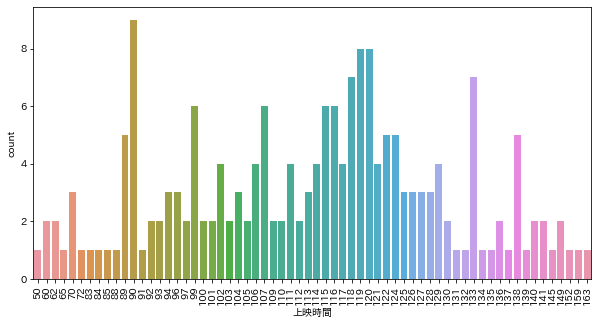

In [121]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['上映時間'].dropna().sort_values())

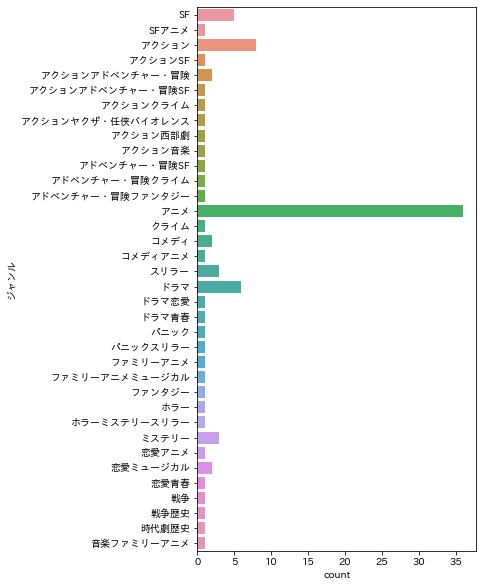

In [122]:
plt.figure(figsize=(5,10))
plt.yticks(rotation=0)
sns.countplot(y=df['ジャンル'].dropna().sort_values())

In [123]:
df[df['上映日：製作国：上映時間'].apply(lambda x: True if '製作国' in x else False ) == False]

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,ディラン・ミネット,西島秀俊,キャロリン・アデール,シュキ・レヴィ,ロバート・ダウニー・Jr,トマ・ラングマン,葉加瀬マイ,大鷹明良,デイナ・ゲイアー,ブレントン・スウェイツ,美山加恋,パラビ・シャーダ,富田望生,...,新妻聖子,鈴木達央,ウィンストン・チャオ,ダフネ・キーン,ジェレミー・レイ・テイラー,クレイグ・ホール,雨谷和砂,スティーヴン・ウィリアムズ,ピーター・バーグ,キャロル・ノーブル,ルパート・サンダーズ,スティーヴン・グレアム,北原帆夏,J・K・シモンズ,ルーク・デイヴィス,伊藤かな恵,リジー・キャプラン,クランシー・ブラウン,ロビン・ライト,チャド・スタエルスキー,藤谷理子,ブリー・ラーソン,一ノ瀬ワタル,城戸康裕,武田航平,M・ナイト・シャマラン,大河内一楼,ともさかりえ,ダニエル・ゼヴァット,グレン・パウエル,グレアム・グリーン,ELLY,潘めぐみ,サイード・タグマウイ,月川翔,ポム・クレメンティーフ,藤子・F・不二雄,岩井俊二,金田治,ジョン・ホッジ
28,NaN,NaN,2017年,上映日：2017年02月11日 ／ 上映時間：120分,NaN,NaN,NaN,NaN,120,NaN,['橋本一'],['太田愛'],[],"['橋本一', '太田愛', '水谷豊', '反町隆史', '仲間由紀恵', '北村一輝',...",https://filmarks.com/movies/71128,29.0,Partners: The Movie IV,相棒 劇場版W 首都クライシス 人質は50万人！特命係 最後の決断,347,Toei Company\n\n,"$15,104,791","$15,104,791",2017.0,橋本一,太田愛,"橋本一, 太田愛, 水谷豊, 反町隆史, 仲間由紀恵, 北村一輝, 及川光博, 石坂浩二, ...",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
173,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,NaN,2016年,上映日：2016年12月10日 ／ 上映時間：89分,NaN,NaN,NaN,NaN,89,NaN,[],[],['石ノ森章太郎'],"['石ノ森章太郎', '飯島寛騎', '西銘駿', '棚橋弘至', '佐野史郎']",https://filmarks.com/movies/70958,173.0,Kamen Rider Heisei Generations: Dr. Pac-Man vs...,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,-,Toei Company\n\n,"$281,194","$6,394,531",2017.0,,,"石ノ森章太郎, 飯島寛騎, 西銘駿, 棚橋弘至, 佐野史郎",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
df[df['上映日：製作国：上映時間'].apply(lambda x: True if '製作国' in x else False ) == False].drop(index=28, axis=0)

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,ディラン・ミネット,西島秀俊,キャロリン・アデール,シュキ・レヴィ,ロバート・ダウニー・Jr,トマ・ラングマン,葉加瀬マイ,大鷹明良,デイナ・ゲイアー,ブレントン・スウェイツ,美山加恋,パラビ・シャーダ,富田望生,...,新妻聖子,鈴木達央,ウィンストン・チャオ,ダフネ・キーン,ジェレミー・レイ・テイラー,クレイグ・ホール,雨谷和砂,スティーヴン・ウィリアムズ,ピーター・バーグ,キャロル・ノーブル,ルパート・サンダーズ,スティーヴン・グレアム,北原帆夏,J・K・シモンズ,ルーク・デイヴィス,伊藤かな恵,リジー・キャプラン,クランシー・ブラウン,ロビン・ライト,チャド・スタエルスキー,藤谷理子,ブリー・ラーソン,一ノ瀬ワタル,城戸康裕,武田航平,M・ナイト・シャマラン,大河内一楼,ともさかりえ,ダニエル・ゼヴァット,グレン・パウエル,グレアム・グリーン,ELLY,潘めぐみ,サイード・タグマウイ,月川翔,ポム・クレメンティーフ,藤子・F・不二雄,岩井俊二,金田治,ジョン・ホッジ
173,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,NaN,2016年,上映日：2016年12月10日 ／ 上映時間：89分,NaN,NaN,NaN,NaN,89,NaN,[],[],['石ノ森章太郎'],"['石ノ森章太郎', '飯島寛騎', '西銘駿', '棚橋弘至', '佐野史郎']",https://filmarks.com/movies/70958,173.0,Kamen Rider Heisei Generations: Dr. Pac-Man vs...,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,-,Toei Company\n\n,"$281,194","$6,394,531",2017.0,,,"石ノ森章太郎, 飯島寛騎, 西銘駿, 棚橋弘至, 佐野史郎",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [125]:
df.loc[28,'タイトル(日本名)'] = '相棒 劇場版Ⅳ 首都クライシス 人質は50万人！特命係 最後の決断'
df.loc[28,'上映日：製作国：上映時間'] = '上映日：2017年02月11日 ／ 製作国 : 日本 ／ 上映時間：120分	'

In [126]:
df.loc[28]

タイトル(日本名)              相棒 劇場版Ⅳ 首都クライシス 人質は50万人！特命係 最後の決断
タイトル(英名)                                             NaN
製作日                                                2017年
上映日：製作国：上映時間    上映日：2017年02月11日 ／ 製作国 : 日本 ／ 上映時間：120分\t
年(上映日)                                               NaN
                                  ...                   
ポム・クレメンティーフ                                        False
藤子・F・不二雄                                           False
岩井俊二                                               False
金田治                                                False
ジョン・ホッジ                                            False
Name: 28, Length: 2231, dtype: object

In [127]:
df[df['上映日：製作国：上映時間'].apply(lambda x: True if '製作国' in x else False ) == False]

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,ディラン・ミネット,西島秀俊,キャロリン・アデール,シュキ・レヴィ,ロバート・ダウニー・Jr,トマ・ラングマン,葉加瀬マイ,大鷹明良,デイナ・ゲイアー,ブレントン・スウェイツ,美山加恋,パラビ・シャーダ,富田望生,...,新妻聖子,鈴木達央,ウィンストン・チャオ,ダフネ・キーン,ジェレミー・レイ・テイラー,クレイグ・ホール,雨谷和砂,スティーヴン・ウィリアムズ,ピーター・バーグ,キャロル・ノーブル,ルパート・サンダーズ,スティーヴン・グレアム,北原帆夏,J・K・シモンズ,ルーク・デイヴィス,伊藤かな恵,リジー・キャプラン,クランシー・ブラウン,ロビン・ライト,チャド・スタエルスキー,藤谷理子,ブリー・ラーソン,一ノ瀬ワタル,城戸康裕,武田航平,M・ナイト・シャマラン,大河内一楼,ともさかりえ,ダニエル・ゼヴァット,グレン・パウエル,グレアム・グリーン,ELLY,潘めぐみ,サイード・タグマウイ,月川翔,ポム・クレメンティーフ,藤子・F・不二雄,岩井俊二,金田治,ジョン・ホッジ
173,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,NaN,2016年,上映日：2016年12月10日 ／ 上映時間：89分,NaN,NaN,NaN,NaN,89,NaN,[],[],['石ノ森章太郎'],"['石ノ森章太郎', '飯島寛騎', '西銘駿', '棚橋弘至', '佐野史郎']",https://filmarks.com/movies/70958,173.0,Kamen Rider Heisei Generations: Dr. Pac-Man vs...,仮面ライダー平成ジェネレーションズ Dr.パックマン対エグゼイド＆ゴースト with レジェ...,-,Toei Company\n\n,"$281,194","$6,394,531",2017.0,,,"石ノ森章太郎, 飯島寛騎, 西銘駿, 棚橋弘至, 佐野史郎",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [128]:
df.loc[173,'上映日：製作国：上映時間'] = '上映日：2016年12月10日 ／ 製作国 : 日本 ／ 上映時間：89分'

In [129]:
df['上映日：製作国：上映時間'].unique()

array(['上映日：2017年04月21日 ／ 製作国：アメリカ ／ 上映時間：130分',
       '上映日：2017年07月21日 ／ 製作国：アメリカ ／ 上映時間：90分',
       '上映日：2017年07月01日 ／ 製作国：アメリカ ／ 上映時間：129分',
       '上映日：2016年08月26日 ／ 製作国：日本 ／ 上映時間：107分',
       '上映日：2017年03月10日 ／ 製作国：アメリカ ／ 上映時間：107分',
       '上映日：2017年03月17日 ／ 製作国：アメリカ ／ 上映時間：110分',
       '上映日：2017年12月15日 ／ 製作国：アメリカ ／ 上映時間：152分',
       '上映日：2017年04月15日 ／ 製作国：日本 ／ 上映時間：112分',
       '上映日：2017年03月04日 ／ 製作国：日本 ／ 上映時間：101分',
       '上映日：2017年02月24日 ／ 製作国：アメリカ ／ 上映時間：126分',
       '上映日：2017年04月28日 ／ 製作国：アメリカ ／ 上映時間：136分',
       '上映日：2017年07月14日 ／ 製作国：日本 ／ 上映時間：130分',
       '上映日：2017年07月28日 ／ 製作国：日本 ／ 上映時間：115分',
       '上映日：2017年07月15日 ／ 製作国：日本 ／ 上映時間：99分',
       '上映日：2017年07月08日 ／ 製作国：日本 ／ 上映時間：102分',
       '上映日：2017年08月11日 ／ 製作国：アメリカ ／ 上映時間：133分',
       '上映日：2017年06月10日 ／ 製作国：日本 ／ 上映時間：116分',
       '上映日：2017年08月26日 ／ 製作国：日本 ／ 上映時間：149分',
       '上映日：2016年12月23日 ／ 製作国：アメリカ ／ 上映時間：107分',
       '上映日：2017年07月01日 ／ 製作国：日本 ／ 上映時間：125分',
       '上映日：2017年06月10日 ／ 製作国：日本 ／ 上映時間：12

In [130]:
df[df['上映日：製作国：上映時間'] == '製作国：日本 ／ 上映時間：122分']

,タイトル(日本名),タイトル(英名),製作日,上映日：製作国：上映時間,年(上映日),月(上映日),日(上映日),製作国,上映時間,ジャンル,監督,脚本,原作,キャスト,URL,Rank,Title,Title (ja),Theaters,Distributor,Gross,Total Gross,age,directors,writers,casts,,ディラン・ミネット,西島秀俊,キャロリン・アデール,シュキ・レヴィ,ロバート・ダウニー・Jr,トマ・ラングマン,葉加瀬マイ,大鷹明良,デイナ・ゲイアー,ブレントン・スウェイツ,美山加恋,パラビ・シャーダ,富田望生,...,新妻聖子,鈴木達央,ウィンストン・チャオ,ダフネ・キーン,ジェレミー・レイ・テイラー,クレイグ・ホール,雨谷和砂,スティーヴン・ウィリアムズ,ピーター・バーグ,キャロル・ノーブル,ルパート・サンダーズ,スティーヴン・グレアム,北原帆夏,J・K・シモンズ,ルーク・デイヴィス,伊藤かな恵,リジー・キャプラン,クランシー・ブラウン,ロビン・ライト,チャド・スタエルスキー,藤谷理子,ブリー・ラーソン,一ノ瀬ワタル,城戸康裕,武田航平,M・ナイト・シャマラン,大河内一楼,ともさかりえ,ダニエル・ゼヴァット,グレン・パウエル,グレアム・グリーン,ELLY,潘めぐみ,サイード・タグマウイ,月川翔,ポム・クレメンティーフ,藤子・F・不二雄,岩井俊二,金田治,ジョン・ホッジ
103,ガールズ&パンツァー 第63回戦車道全国高校生大会 総集編,NaN,2017年,製作国：日本 ／ 上映時間：122分,NaN,NaN,NaN,製作国：日本,122,アニメ,['水島努'],[],[],"['水島努', '渕上舞', '茅野愛衣', '尾崎 真実', '中上育実', '井口裕香']",https://filmarks.com/movies/77541,105.0,Girls und Panzer das Finale: Part I,ガールズ&パンツァー 第63回戦車道全国高校生大会 総集編,-,Showgate\n\n,"$3,017,781","$3,017,781",2017.0,水島努,,"水島努, 渕上舞, 茅野愛衣, 尾崎 真実, 中上育実, 井口裕香",True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [131]:
#調べました

df.loc[103, '上映日：製作国：上映時間'] = '上映日：2018年9月29日 ／ 製作国：日本 ／ 上映時間：122分'

In [132]:
df['年(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.split('／')[0].replace('上映日：','').split('年')[0])
df['月(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.split('／')[0].replace('上映日：','').split('年')[1].split('月')[0])
df['日(上映日)'] = df['上映日：製作国：上映時間'].apply(lambda x: x.split('／')[0].replace('上映日：','').split('年')[1].split('月')[1])

df['製作国'] = df['上映日：製作国：上映時間'].apply(lambda x: x.split('／')[1].replace('製作国：',''))

In [133]:
df['新海誠']

0      False
1      False
2      False
3       True
4      False
       ...  
185    False
186    False
187    False
188    False
189    False
Name: 新海誠, Length: 190, dtype: bool

In [134]:
for c in df.columns:
  if df[c].dtype == bool :
    df[c] = df[c].astype(int)

In [135]:
df['新海誠']

0      0
1      0
2      0
3      1
4      0
      ..
185    0
186    0
187    0
188    0
189    0
Name: 新海誠, Length: 190, dtype: int64

In [136]:
df.to_csv('/content/drive/MyDrive/Movies/data/prepro_data/data_2017.csv', index=False)